### Data Wrangling of USDA Fire Emissions Data Set (2003-2015)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt, time

%matplotlib inline

In [2]:
# Load Emissions CSV File
NASA = pd.read_csv('NASA_V1_combined.csv')

C:\Users\mharr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Use pandas to view the first 5 rows of the file
NASA.head(5)

,acq_date,acq_time,bright_ti4,bright_ti5,confidence,daynight,frp,instrument,latitude,longitude,satellite,scan,track,type,version
0,2019-10-01,612,307.3,288.6,n,N,2.3,VIIRS,41.46153,-81.67585,N,0.69,0.74,NaN,1.0NRT
1,2019-10-01,612,312.8,288.3,n,N,2.1,VIIRS,41.45969,-81.67487,N,0.69,0.74,NaN,1.0NRT
2,2019-10-01,612,336.8,287.2,n,N,4.8,VIIRS,34.66630,-80.58686,N,0.55,0.68,NaN,1.0NRT
3,2019-10-01,612,307.7,286.4,n,N,1.7,VIIRS,37.23220,-82.03742,N,0.69,0.74,NaN,1.0NRT
4,2019-10-01,612,297.7,285.9,n,N,2.3,VIIRS,37.22986,-82.04183,N,0.69,0.74,NaN,1.0NRT


In [4]:
# What are the dtypes of the columns
NASA.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10820816 entries, 0 to 10820815
Data columns (total 15 columns):
acq_date      object
acq_time      int64
bright_ti4    float64
bright_ti5    float64
confidence    object
daynight      object
frp           float64
instrument    object
latitude      float64
longitude     float64
satellite     object
scan          float64
track         float64
type          float64
version       object
dtypes: float64(8), int64(1), object(6)
memory usage: 1.2+ GB


In [5]:
# How many rows and columns is the dataset?
NASA.shape

(10820816, 15)

In [6]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*NASA.shape))

10820816 instances with 15 features



In [7]:
# Checking to see that all years were combined to file
print(NASA['acq_date'].unique())

['2019-10-01' '2019-10-02' '2019-10-03' ... '2019-09-28' '2019-09-29'
 '2019-09-30']


In [8]:
# Checking for null values
NASA.isnull().sum()

acq_date             0
acq_time             0
bright_ti4           0
bright_ti5           0
confidence           0
daynight      10594043
frp                  0
instrument           0
latitude             0
longitude            0
satellite            0
scan                 0
track                0
type            226773
version              0
dtype: int64

In [9]:
# Removing select columns that are not necessary per earlier team discussion
NASA = NASA.drop(['instrument', 'satellite', 'scan', 'track'], 1)

In [10]:
# Verify the three columns were dropped
NASA.shape

(10820816, 11)

In [11]:
# Use pandas to get the summary statistics on the data
NASA.describe()

,acq_time,bright_ti4,bright_ti5,frp,latitude,longitude,type
count,1.082082e+07,1.082082e+07,1.082082e+07,1.082082e+07,1.082082e+07,1.082082e+07,1.059404e+07
mean,1.435303e+03,3.278395e+02,2.920592e+02,1.228721e+01,3.950159e+01,-1.075576e+02,4.513891e-01
std,5.632978e+02,2.117195e+01,1.240298e+01,3.778120e+01,9.644486e+00,2.112151e+01,9.152609e-01
min,0.000000e+00,2.080000e+02,0.000000e+00,0.000000e+00,1.891902e+01,-1.788074e+02,0.000000e+00
25%,9.080000e+02,3.071000e+02,2.848000e+02,1.700000e+00,3.312107e+01,-1.197162e+02,0.000000e+00
50%,1.735000e+03,3.308000e+02,2.910000e+02,4.000000e+00,3.849042e+01,-1.041523e+02,0.000000e+00
75%,1.942000e+03,3.430000e+02,2.984000e+02,9.500000e+00,4.434374e+01,-9.016537e+01,0.000000e+00
max,2.359000e+03,3.670000e+02,3.800000e+02,8.065400e+03,7.132837e+01,1.795834e+02,3.000000e+00


In [12]:
NASA.sort_values(by='frp', ascending=False).head(10)

,acq_date,acq_time,bright_ti4,bright_ti5,confidence,daynight,frp,latitude,longitude,type,version
2800151,2017-07-31,1024,297.7,286.8,n,NaN,8065.4,48.80692,-117.24569,0.0,1
6629845,2017-07-31,1024,297.7,286.8,n,NaN,8065.4,48.80692,-117.24569,0.0,1
9564500,2017-07-31,1024,297.7,286.8,n,NaN,8065.4,48.80692,-117.24569,0.0,1
9684259,2017-09-02,2132,367.0,380.0,l,NaN,6868.7,45.28411,-115.12079,0.0,1
6749604,2017-09-02,2132,367.0,380.0,l,NaN,6868.7,45.28411,-115.12079,0.0,1
2919910,2017-09-02,2132,367.0,380.0,l,NaN,6868.7,45.28411,-115.12079,0.0,1
6629840,2017-07-31,1024,300.5,290.0,n,NaN,3994.3,48.80873,-117.23483,0.0,1
6629861,2017-07-31,1024,306.8,289.6,n,NaN,3994.3,48.80521,-117.23811,0.0,1
2800167,2017-07-31,1024,306.8,289.6,n,NaN,3994.3,48.80521,-117.23811,0.0,1
9564495,2017-07-31,1024,300.5,290.0,n,NaN,3994.3,48.80873,-117.23483,0.0,1


In [13]:
NASA[['frp']].agg(['mean','min','max'])

,frp
mean,12.287206
min,0.000000
max,8065.400000


In [14]:
# Check if there are any empty/missing values from the csv that would cause errors when we run the scikit-learn tools
NASA.isnull().values.any()

True

In [15]:
# How many values are there where frp = 0?
len(NASA.loc[NASA['frp'] == 0.0])

297

In [16]:
NASA[['bright_ti4', 'bright_ti5']].agg(['mean','min','max'])

,bright_ti4,bright_ti5
mean,327.8395,292.059227
min,208.0000,0.000000
max,367.0000,380.000000


In [17]:
NASA2 = NASA.groupby('bright_ti4')['frp'].max().sort_values(ascending = False)
NASA.head()

,acq_date,acq_time,bright_ti4,bright_ti5,confidence,daynight,frp,latitude,longitude,type,version
0,2019-10-01,612,307.3,288.6,n,N,2.3,41.46153,-81.67585,NaN,1.0NRT
1,2019-10-01,612,312.8,288.3,n,N,2.1,41.45969,-81.67487,NaN,1.0NRT
2,2019-10-01,612,336.8,287.2,n,N,4.8,34.66630,-80.58686,NaN,1.0NRT
3,2019-10-01,612,307.7,286.4,n,N,1.7,37.23220,-82.03742,NaN,1.0NRT
4,2019-10-01,612,297.7,285.9,n,N,2.3,37.22986,-82.04183,NaN,1.0NRT


C:\Users\mharr\Anaconda3\lib\site-packages\seaborn\distributions.py:334: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.fill_between(x, 0, y, **shade_kws)


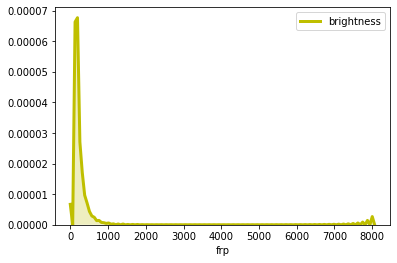

In [19]:
sns.distplot(NASA['frp'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color': 'Y'}, 
                  label = 'brightness')

Text(0, 0.5, '# of Fire Instances')

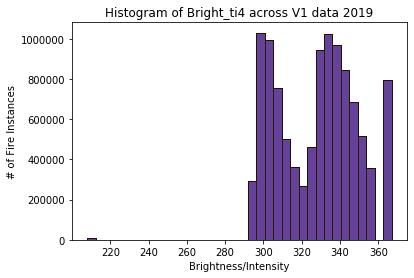

In [20]:
# matplotlib histogram
plt.hist(NASA['bright_ti4'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(NASA['bright_ti4'], hist=True, kde=False, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Bright_ti4 across V1 data 2019')
plt.xlabel('Brightness/Intensity')
plt.ylabel('# of Fire Instances')